In [22]:
#import modules
import numpy
import scipy
import Bio
import math
import tensorly
from tensorly.decomposition import non_negative_parafac
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn import svm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
random_state = numpy.random.RandomState(0)

#import data in tensor form
final_tensor = numpy.load("/Users/polina_turova/Documents/asp/Bigmingham/work folder/numpy arrays/final_tensor_57_samples.npy",allow_pickle=True)
labels = numpy.load("/Users/polina_turova/Documents/asp/Bigmingham/work folder/numpy arrays/labels_57_samples.npy",allow_pickle=True)
al_time = numpy.arange(3.02,22.0,0.05)

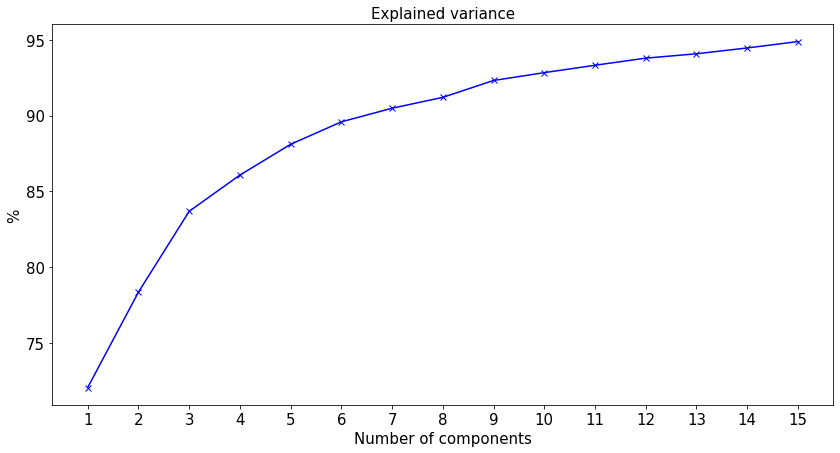

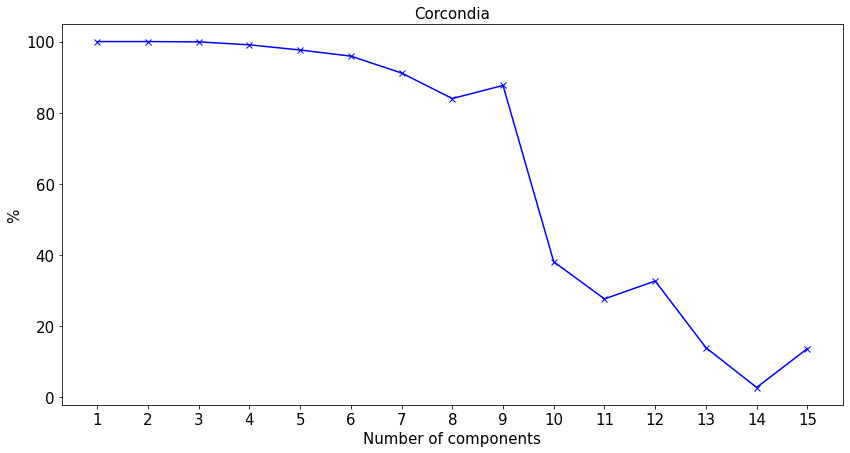

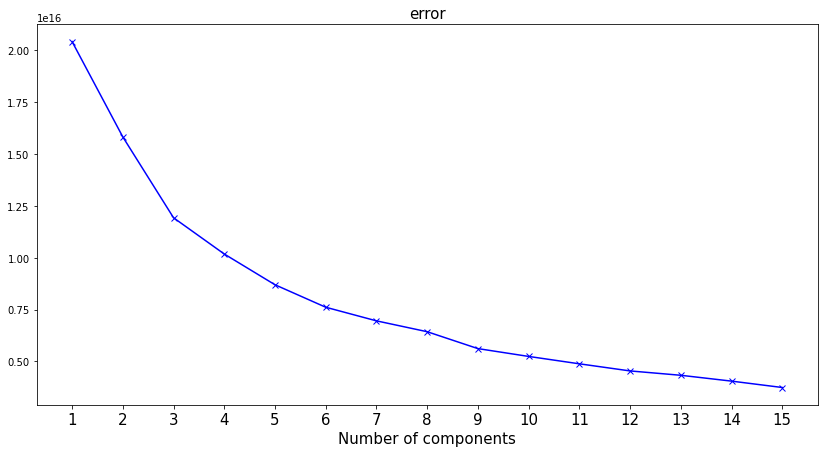

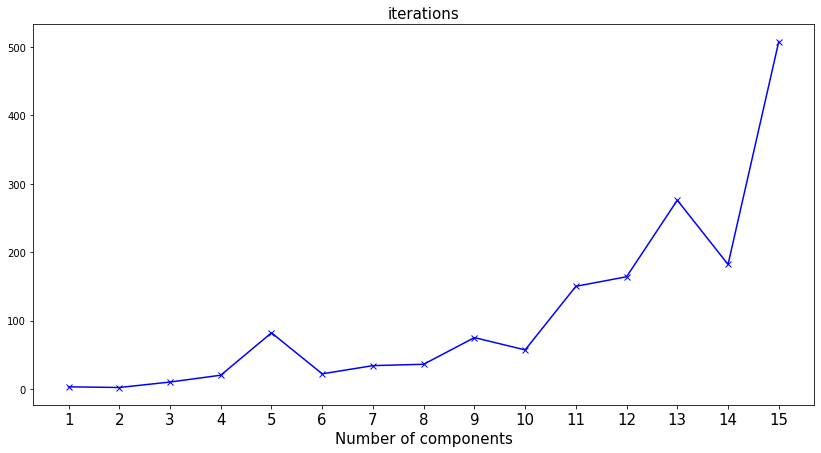

In [8]:
#calculate corcondia, number of iterations, error and explained variance 
#for decompositions with number of coponents in range from 1 to 15 and choose optimal number
corcondia = loadmat("/Users/polina_turova/Documents/MATLAB/all_corc_19.mat")
all_it = loadmat("/Users/polina_turova/Documents/MATLAB/all_it_19.mat")
all_er = loadmat("/Users/polina_turova/Documents/MATLAB/all_err_19.mat")
f = open('/Users/polina_turova/Documents/MATLAB/expl_var_19.txt', 'r')
expl_var = []
for line in f:
    expl_var.append (float(line[:-1]))
expl_var = numpy.array(expl_var)
x = numpy.arange (1,16)

plt.figure(figsize=(14, 7))
plt.plot(x,expl_var,'bx-')
plt.title('Explained variance',size=15)
plt.xlabel("Number of components",size=15)
plt.ylabel("%",size=15)
plt.xticks(numpy.arange (1,16),size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(x,corcondia['all_corc'][0],'bx-')
plt.title('Corcondia',size=15)
plt.xlabel("Number of components",size=15)
plt.ylabel("%",size=15)
plt.xticks(numpy.arange (1,16),size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(x,all_er['all_err'][0],'bx-')
plt.xlabel("Number of components",size=15)
plt.title('error',size=15)
plt.xticks(numpy.arange (1,16),size=15)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(x,all_it['all_it'][0],'bx-')
plt.xlabel("Number of components",size=15)
plt.title('iterations',size=15)
plt.xticks(numpy.arange (1,16),size=15)
plt.show()

Text(0, 0.5, 'PARAFAC loadings')

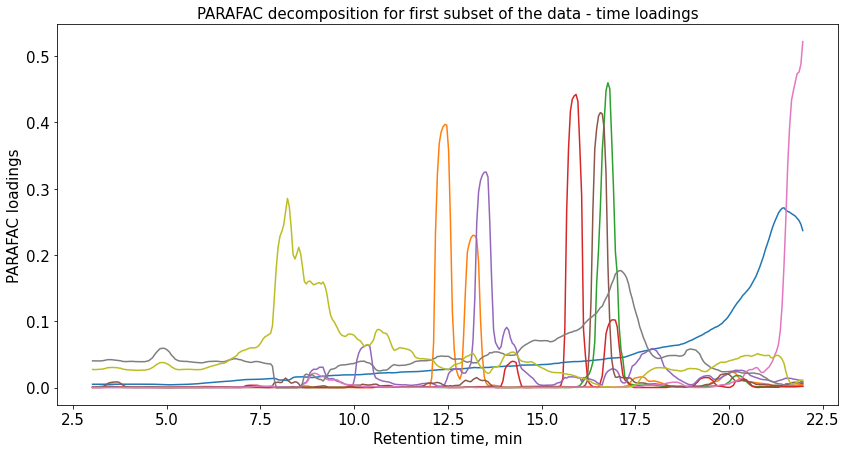

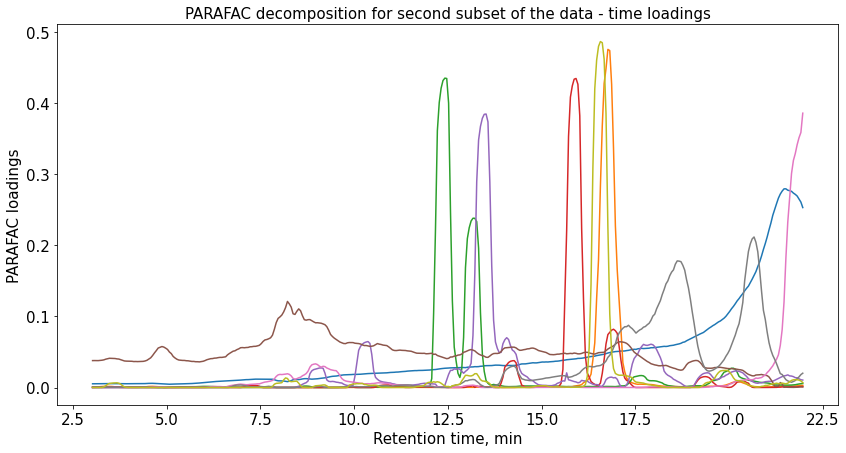

In [12]:
#prove the choice by half-split analysis
X_train=[]
for i in (0,1,3,6,7,9,12,13,15,18,19,21,24,25,27,30,31,33,36,37,39,42,43,45,48,49,51,54,55):
    X_train.append(final_tensor[i])
X_test=[]
for i in (2,4,5,8,10,11,14,16,17,20,22,23,26,28,29,32,34,35,38,40,41,44,46,47,50,52,53,56):
    X_test.append(final_tensor[i])
X_train=numpy.array(X_train)
X_test=numpy.array(X_test)

weights,factors_non_negative_X_train = non_negative_parafac(X_train,rank=9)
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(al_time,(abs(factors_non_negative_X_train[1])))
plt.title('PARAFAC decomposition for first subset of the data - time loadings',size=15)
plt.xlabel("Retention time, min",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel("PARAFAC loadings",size=15)

weights,factors_non_negative_X_test = non_negative_parafac(X_test,rank=9)
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(al_time,(abs(factors_non_negative_X_test[1])))
plt.title('PARAFAC decomposition for second subset of the data - time loadings',size=15)
plt.xlabel("Retention time, min",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel("PARAFAC loadings",size = 15)

Text(0, 0.5, 'PARAFAC loadings')

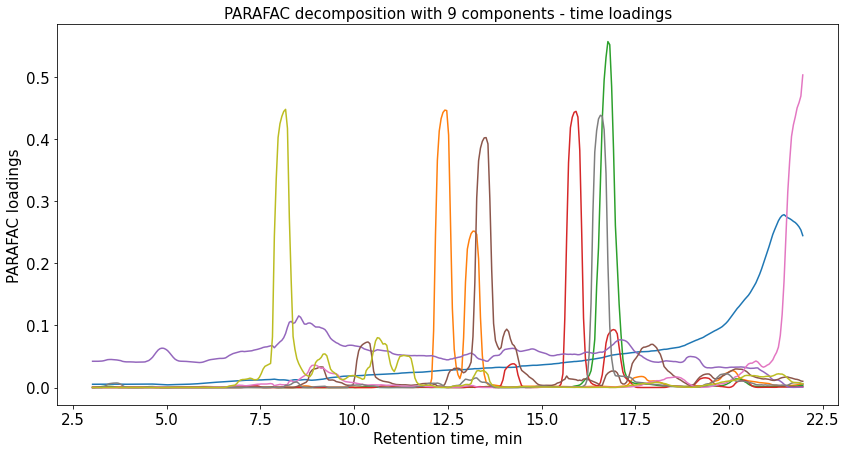

In [14]:
weights_non_negative,factors_non_negative = non_negative_parafac(final_tensor,rank=9)
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(al_time,((factors_non_negative[1])))
plt.title('PARAFAC decomposition with 9 components - time loadings',size=15)
plt.xlabel("Retention time, min",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel("PARAFAC loadings",size = 15)

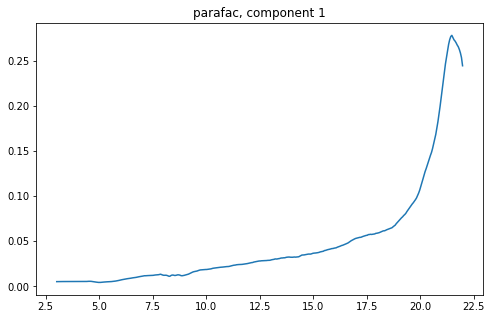


component 1
m/z weight
142 21.47
143 21.42
128 21.52
140 21.37
139 21.57
114 21.62
141 21.67
116 21.32
129 21.72
130 21.77
144 21.82
156 21.27
115 21.87
158 21.22
153 21.92
167 21.17
101 21.97
157 21.12
117 21.07
126 21.02
154 20.97
131 20.92
145 20.87
125 20.82
149 20.77
199 20.72
112 20.67
118 20.62
168 20.57
127 20.52
159 20.47
155 20.42
183 20.37
138 20.32
590 20.27
634 20.22
607 20.17
113 20.12
678 20.07
146 20.02
546 19.97
338 19.92
608 19.87
132 19.82
339 19.77
635 19.72
722 19.67
165 19.62
679 19.57
110 19.52
200 19.47
591 19.42
172 19.37
102 19.32
352 19.27
171 19.22
596 19.17
526 19.12
570 19.07
547 19.02
119 18.97
150 18.92
614 18.87
640 18.82
341 18.77
133 18.72
353 18.67
169 18.62
552 18.57
111 18.52
147 18.47
502 18.42
663 18.37
723 18.32
283 18.27
766 18.22
597 18.17
482 18.12
553 18.07
641 18.02
151 17.97
124 17.92
571 17.87
135 17.82
184 17.77
615 17.67
279 17.72
685 17.62
123 17.57
684 17.52
527 17.47
311 17.42
767 17.37
508 17.32
397 17.27
556 17.22
658 17.17
664 17

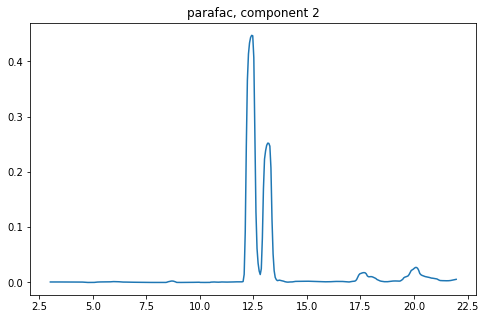


component 2
m/z weight
217 12.42
218 12.47
219 12.37
202 12.32
220 12.27
247 12.52
248 12.22
203 12.57
221 13.17
161 13.22
261 13.12
173 12.17
189 13.27
185 13.07
174 13.02
239 13.32
204 12.97
249 12.62
262 13.37
143 12.12
222 12.92
142 12.67
162 13.42
232 12.72
190 20.07
186 20.12
149 20.02
216 20.17
187 12.87
243 19.97
205 19.92
128 20.22
352 19.87
144 13.47
145 12.77
353 19.82
223 17.67
114 17.62
115 17.72
175 17.57
433 17.52
116 20.27
283 17.77
158 17.47
344 12.07
117 12.82
129 19.77
150 20.32
244 17.42
139 20.37
206 20.42
146 17.82
250 19.72
240 20.47
188 19.67
224 20.52
269 17.97
169 18.02
130 17.87
131 17.92
233 20.57
163 19.62
191 18.07
176 20.62
123 19.57
159 20.67
236 17.37
121 18.12
157 13.52
354 20.72
118 20.77
263 19.52
434 18.17
309 20.82
164 20.87
151 20.92
225 18.22
351 20.97
160 21.02
284 21.07
119 21.97
120 19.47
237 18.27
133 21.92
181 17.32
132 21.12
135 13.57
141 21.87
301 18.32
345 21.82
293 21.17
277 13.72
107 19.42
136 21.77
207 13.67
365 13.77
226 21.72
405 21

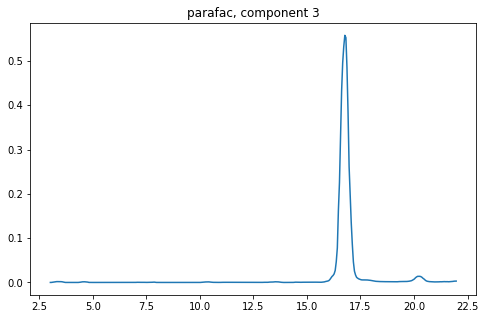


component 3
m/z weight
329 16.77
330 16.82
331 16.72
332 16.67
229 16.87
230 16.62
333 16.92
341 16.57
351 16.97
142 16.52
342 17.02
231 16.47
352 17.07
247 17.12
140 16.42
334 16.37
128 17.17
232 16.32
143 17.22
248 16.27
343 17.27
353 16.22
141 20.22
520 20.27
114 20.17
277 16.17
233 20.32
156 20.12
139 20.37
335 17.32
101 20.07
316 16.12
317 17.37
607 20.42
278 17.42
676 20.02
521 20.47
684 17.47
203 16.07
144 19.97
608 17.52
153 17.62
429 17.57
234 17.77
213 17.67
367 17.72
677 17.82
249 20.52
354 17.87
187 17.92
629 19.92
685 17.97
344 18.02
214 16.02
483 19.87
381 20.57
609 18.07
318 18.12
470 19.82
263 15.97
145 21.97
657 21.92
655 18.17
100 21.87
383 19.77
668 20.62
519 15.92
413 18.22
522 19.72
204 21.82
669 18.27
512 19.67
336 19.62
419 18.32
337 20.67
686 19.57
430 19.42
630 18.37
201 19.47
250 19.52
157 21.77
625 15.87
610 19.37
382 18.42
348 3.42
130 19.32
154 3.37
595 3.32
359 18.47
264 21.42
626 3.47
368 21.52
158 21.72
471 20.72
571 19.27
627 18.52
679 21.37
235 21.57


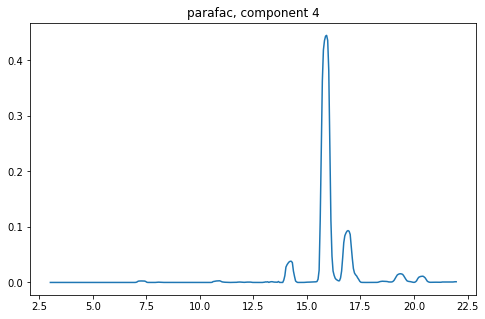


component 4
m/z weight
203 15.92
204 15.87
205 15.97
206 15.82
271 15.77
142 16.02
147 15.72
175 16.07
341 15.67
207 16.12
245 15.62
272 16.92
140 16.87
342 16.97
143 16.82
225 17.02
176 16.77
215 16.72
246 17.07
148 16.17
293 16.67
208 17.12
159 14.27
128 14.22
141 14.17
131 14.32
287 14.12
229 14.07
183 14.02
209 17.17
114 15.57
288 16.22
149 16.62
294 14.37
105 17.22
156 19.37
459 19.32
160 19.42
224 19.27
343 19.47
185 17.27
157 19.22
216 16.27
595 13.97
153 19.52
273 17.32
613 20.42
144 20.37
298 14.42
139 20.32
202 19.17
443 20.27
226 20.47
607 20.22
193 19.57
177 20.52
184 17.37
101 16.57
154 16.32
161 19.12
247 20.17
210 15.52
460 19.62
132 20.57
608 17.42
129 16.37
335 13.92
596 16.42
201 19.07
289 16.52
461 19.67
629 10.92
230 20.12
186 16.47
277 10.87
611 10.82
106 7.27
150 14.47
145 7.22
295 10.77
318 7.37
212 7.32
614 7.17
241 7.42
211 10.97
319 20.62
609 10.72
313 7.12
444 18.52
217 19.72
332 18.57
337 17.47
317 18.62
278 18.47
100 18.67
263 10.67
316 19.02
158 18.72
336

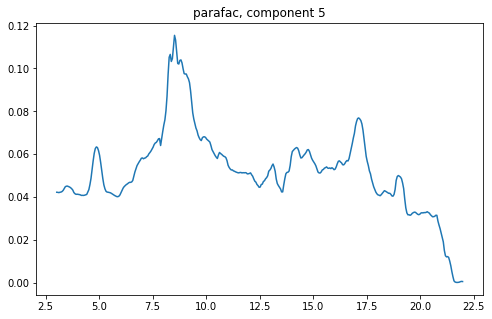


component 5
m/z weight
149 8.52
161 8.57
341 8.47
118 8.62
163 8.32
142 8.27
303 8.42
279 8.82
128 8.77
433 8.37
229 8.87
150 8.67
121 8.72
287 8.92
342 8.97
177 9.02
305 9.07
304 8.22
135 9.12
235 9.17
123 9.22
317 9.27
109 8.17
355 9.32
175 8.12
277 9.37
114 17.12
119 17.07
280 17.17
151 9.42
194 8.07
133 17.22
147 17.02
137 9.47
107 17.27
327 8.02
247 16.97
434 9.52
288 17.32
162 9.57
105 7.97
164 16.92
187 9.62
365 9.92
189 9.87
343 9.97
289 9.67
203 9.82
499 16.87
371 7.92
143 7.82
281 17.37
301 7.77
230 10.02
224 9.72
145 10.07
318 9.77
323 7.72
131 10.12
356 10.17
159 7.67
217 7.62
441 16.82
219 7.57
457 7.87
351 10.22
236 4.87
111 7.52
136 14.22
395 4.92
489 17.42
278 14.27
231 14.17
207 16.77
179 4.82
113 14.12
479 7.47
306 14.77
319 10.27
251 14.72
122 14.07
413 4.97
209 14.32
178 7.42
353 14.82
129 14.02
195 10.32
193 14.67
431 10.62
449 7.37
393 4.77
357 10.67
369 16.72
435 14.62
165 10.37
156 7.32
329 10.72
188 14.87
173 14.37
367 14.57


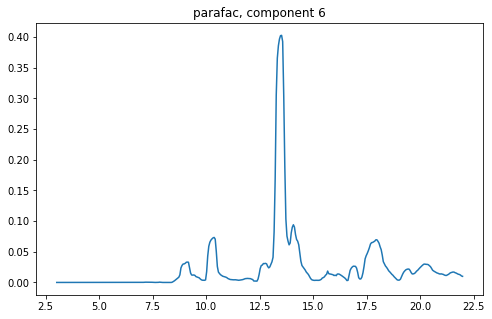


component 6
m/z weight
203 13.52
269 13.47
204 13.42
270 13.57
287 13.37
309 13.32
205 13.27
328 13.62
201 13.67
310 13.22
199 13.72
227 14.07
288 14.12
241 14.02
329 13.17
261 13.97
247 14.17
325 13.77
271 10.37
202 10.32
206 10.27
289 10.42
262 14.22
228 17.97
175 17.92
142 10.22
200 13.82
128 17.87
143 14.27
248 18.02
242 17.82
173 10.17
311 17.77
217 17.72
290 13.92
218 18.07
326 17.67
243 14.32
231 13.87
330 10.12
327 18.12
171 17.62
176 18.17
207 17.57
232 10.47
114 14.37
158 17.52
573 18.22
229 17.47
213 10.07
595 13.12
174 17.42
129 14.42
272 18.27
613 13.07
139 9.12
157 9.17
144 9.07
159 9.02
215 12.77
249 12.67
116 12.72
172 12.82
331 8.97
208 18.32
177 8.92
233 20.17
181 20.22
244 13.02
503 20.27
574 20.32
345 20.37
607 20.12
323 12.62
149 8.87
251 14.47
596 12.57
130 20.42
291 20.07
525 18.37
614 16.87
184 16.92
156 16.97
214 17.37
312 12.87
145 10.52
219 20.47
608 20.02
263 12.97
332 16.82
609 14.52
477 18.42
611 9.22
223 12.92
672 8.82
343 19.97
341 17.02
216 16.77
386 2

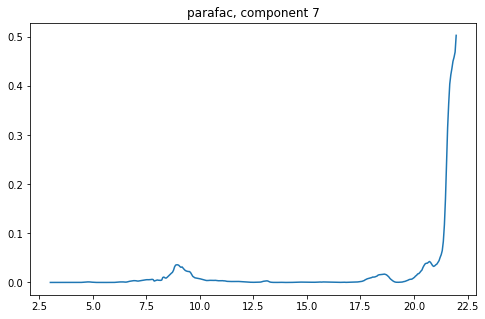


component 7
m/z weight
609 21.97
610 21.92
625 21.87
142 21.82
611 21.77
139 21.72
626 21.67
143 21.62
128 21.57
282 21.52
153 21.47
627 21.42
167 21.37
140 21.32
129 21.27
612 21.22
637 21.17
144 20.72
141 20.77
154 20.67
126 21.12
638 20.62
283 20.57
663 20.52
156 20.82
125 21.07
183 21.02
165 8.92
157 8.97
168 8.87
256 9.02
114 20.47
664 20.87
127 20.97
613 20.92
145 9.07
628 8.82
158 9.17
115 9.12
130 20.42
124 9.22
199 9.27
155 20.37
570 8.77
131 9.32
138 9.37
639 20.32
624 9.42
101 9.47
571 9.52
184 8.72
303 20.27
118 9.57
257 8.67
159 20.22
623 20.17
654 18.62
247 8.62
447 18.57
540 18.52
489 18.67
653 9.62
619 18.47
499 18.42
279 18.37
403 18.72
665 18.32
136 20.12
520 8.57
521 18.77
421 20.07
166 18.27
441 8.52
280 9.67
113 18.22
539 18.82
110 18.17
482 18.07
146 8.32
629 18.12
304 9.72
338 20.02
163 8.47
490 8.27
305 18.02
133 9.77
647 8.37
593 9.82
449 17.97
620 19.97
491 8.42
439 9.87
169 18.87
631 17.92
621 9.92
313 17.87
551 9.97
762 17.82
655 10.02
116 19.92


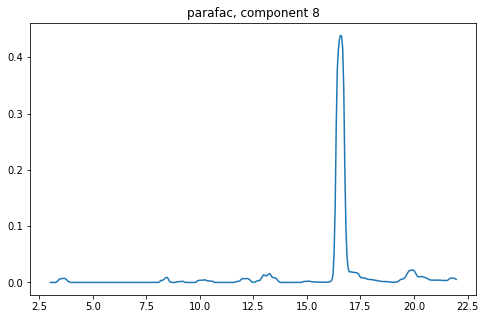


component 8
m/z weight
189 16.57
190 16.62
245 16.52
191 16.67
246 16.47
131 16.42
192 16.72
341 16.37
329 16.77
203 16.32
142 16.82
247 16.27
330 16.87
161 16.92
132 19.92
342 19.97
143 19.87
204 19.82
128 19.77
233 20.02
267 16.97
133 17.07
219 17.02
193 17.12
162 17.17
144 19.72
103 17.22
139 17.27
159 17.32
114 20.07
343 17.37
116 13.27
234 13.22
331 19.67
248 17.42
394 12.97
220 13.17
607 20.12
277 16.22
145 13.02
115 13.32
205 13.07
129 13.12
134 19.62
158 17.47
316 20.17
130 20.32
261 12.92
268 20.37
194 20.27
386 20.42
608 20.22
278 13.37
625 20.47
160 8.47
243 17.52
156 8.42
105 19.57
569 13.47
117 13.42
395 20.52
157 17.57
199 17.62
146 21.77
595 13.52
381 17.67
135 20.57
187 21.82
387 21.72
272 12.87
188 21.87
264 8.37
626 17.72
262 3.67
620 3.62
609 12.22
423 19.52
244 3.57
317 21.67
141 20.62
235 12.02
163 13.57
104 12.12
101 17.77
335 3.72
477 12.17
570 8.52
221 3.52
405 21.92
382 12.07
337 11.97
351 12.27
629 3.47
630 20.67
302 19.47
344 17.82
206 19.42
589 17.87
102 21

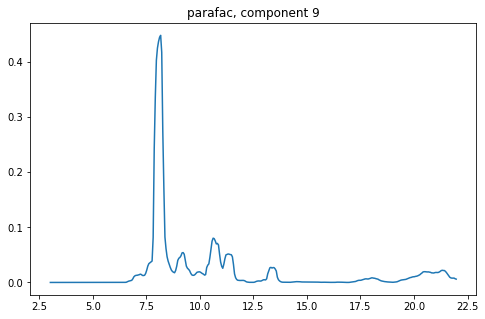


component 9
m/z weight
263 8.17
264 8.12
303 8.07
265 8.02
447 8.22
304 7.97
448 7.92
463 8.27
305 7.87
449 8.32
245 8.37
266 7.82
464 10.62
871 10.67
465 10.72
442 10.57
191 10.82
611 10.77
187 10.87
866 8.42
247 10.52
306 9.22
470 9.17
872 11.32
525 10.92
246 11.37
227 9.27
633 11.27
612 11.42
450 11.47
280 11.22
867 9.12
547 8.47
443 11.52
279 10.47
189 9.07
526 9.02
466 11.17
142 9.32
188 8.97
128 7.77
441 8.52
887 7.72
192 10.97
139 7.67
524 7.62
505 10.42
523 11.12
503 11.57
471 8.57
261 10.37
248 7.57
634 9.37
564 8.92
520 11.02
548 13.32
457 8.62
307 10.32
459 13.42
267 13.47
425 13.27
873 13.37
262 9.42
147 11.07
596 13.52
531 9.47
591 8.67
517 7.52
451 21.32
489 21.37
281 8.87
497 21.42
228 9.52
502 21.27
458 13.22
527 13.57
595 21.47
473 8.72
543 21.22
485 20.47
487 20.52
444 9.97
518 20.57
533 20.67
325 20.62
143 20.42
495 9.92
506 10.02
509 20.72
868 21.17
888 8.77
439 9.87
478 20.77
649 21.02
479 21.07
687 21.12
608 20.97
435 21.52
482 8.82
656 20.82


In [18]:
#compare PARAFAC loadings with features from other methods
features_parafac_mass = numpy.zeros((len(factors_non_negative[0][0]),100))
features_parafac_time = numpy.zeros((len(factors_non_negative[0][0]),100))
for k in range (9):
    features_mass = numpy.argsort(abs(factors_non_negative[2][:,k]))
    features_time = numpy.argsort(abs(factors_non_negative[1][:,k]))
    plt.figure(figsize=(8, 5))
    t=''
    t+='parafac, component '+str(k+1)
    plt.title(t)
    
    plt.plot(al_time,factors_non_negative[1][:,k])

    plt.show()
    print('')
    print('component',k+1)
    print('m/z weight')
    for i in range(1,101):
        print(features_mass[-i]+100,round(al_time[features_time[-i]],2))#,round(factors_non_negative[2][features_mass[-i],k],2))
        features_parafac_mass[k][i-1] = features_mass[-i]+100
        features_parafac_time[k][i-1] = al_time[features_time[-i]]
numpy.save("/Users/polina_turova/Documents/asp/Bigmingham/work folder/numpy arrays/features_parafac_time.npy",features_parafac_time)
numpy.save("/Users/polina_turova/Documents/asp/Bigmingham/work folder/numpy arrays/features_parafac_mass.npy",features_parafac_mass)

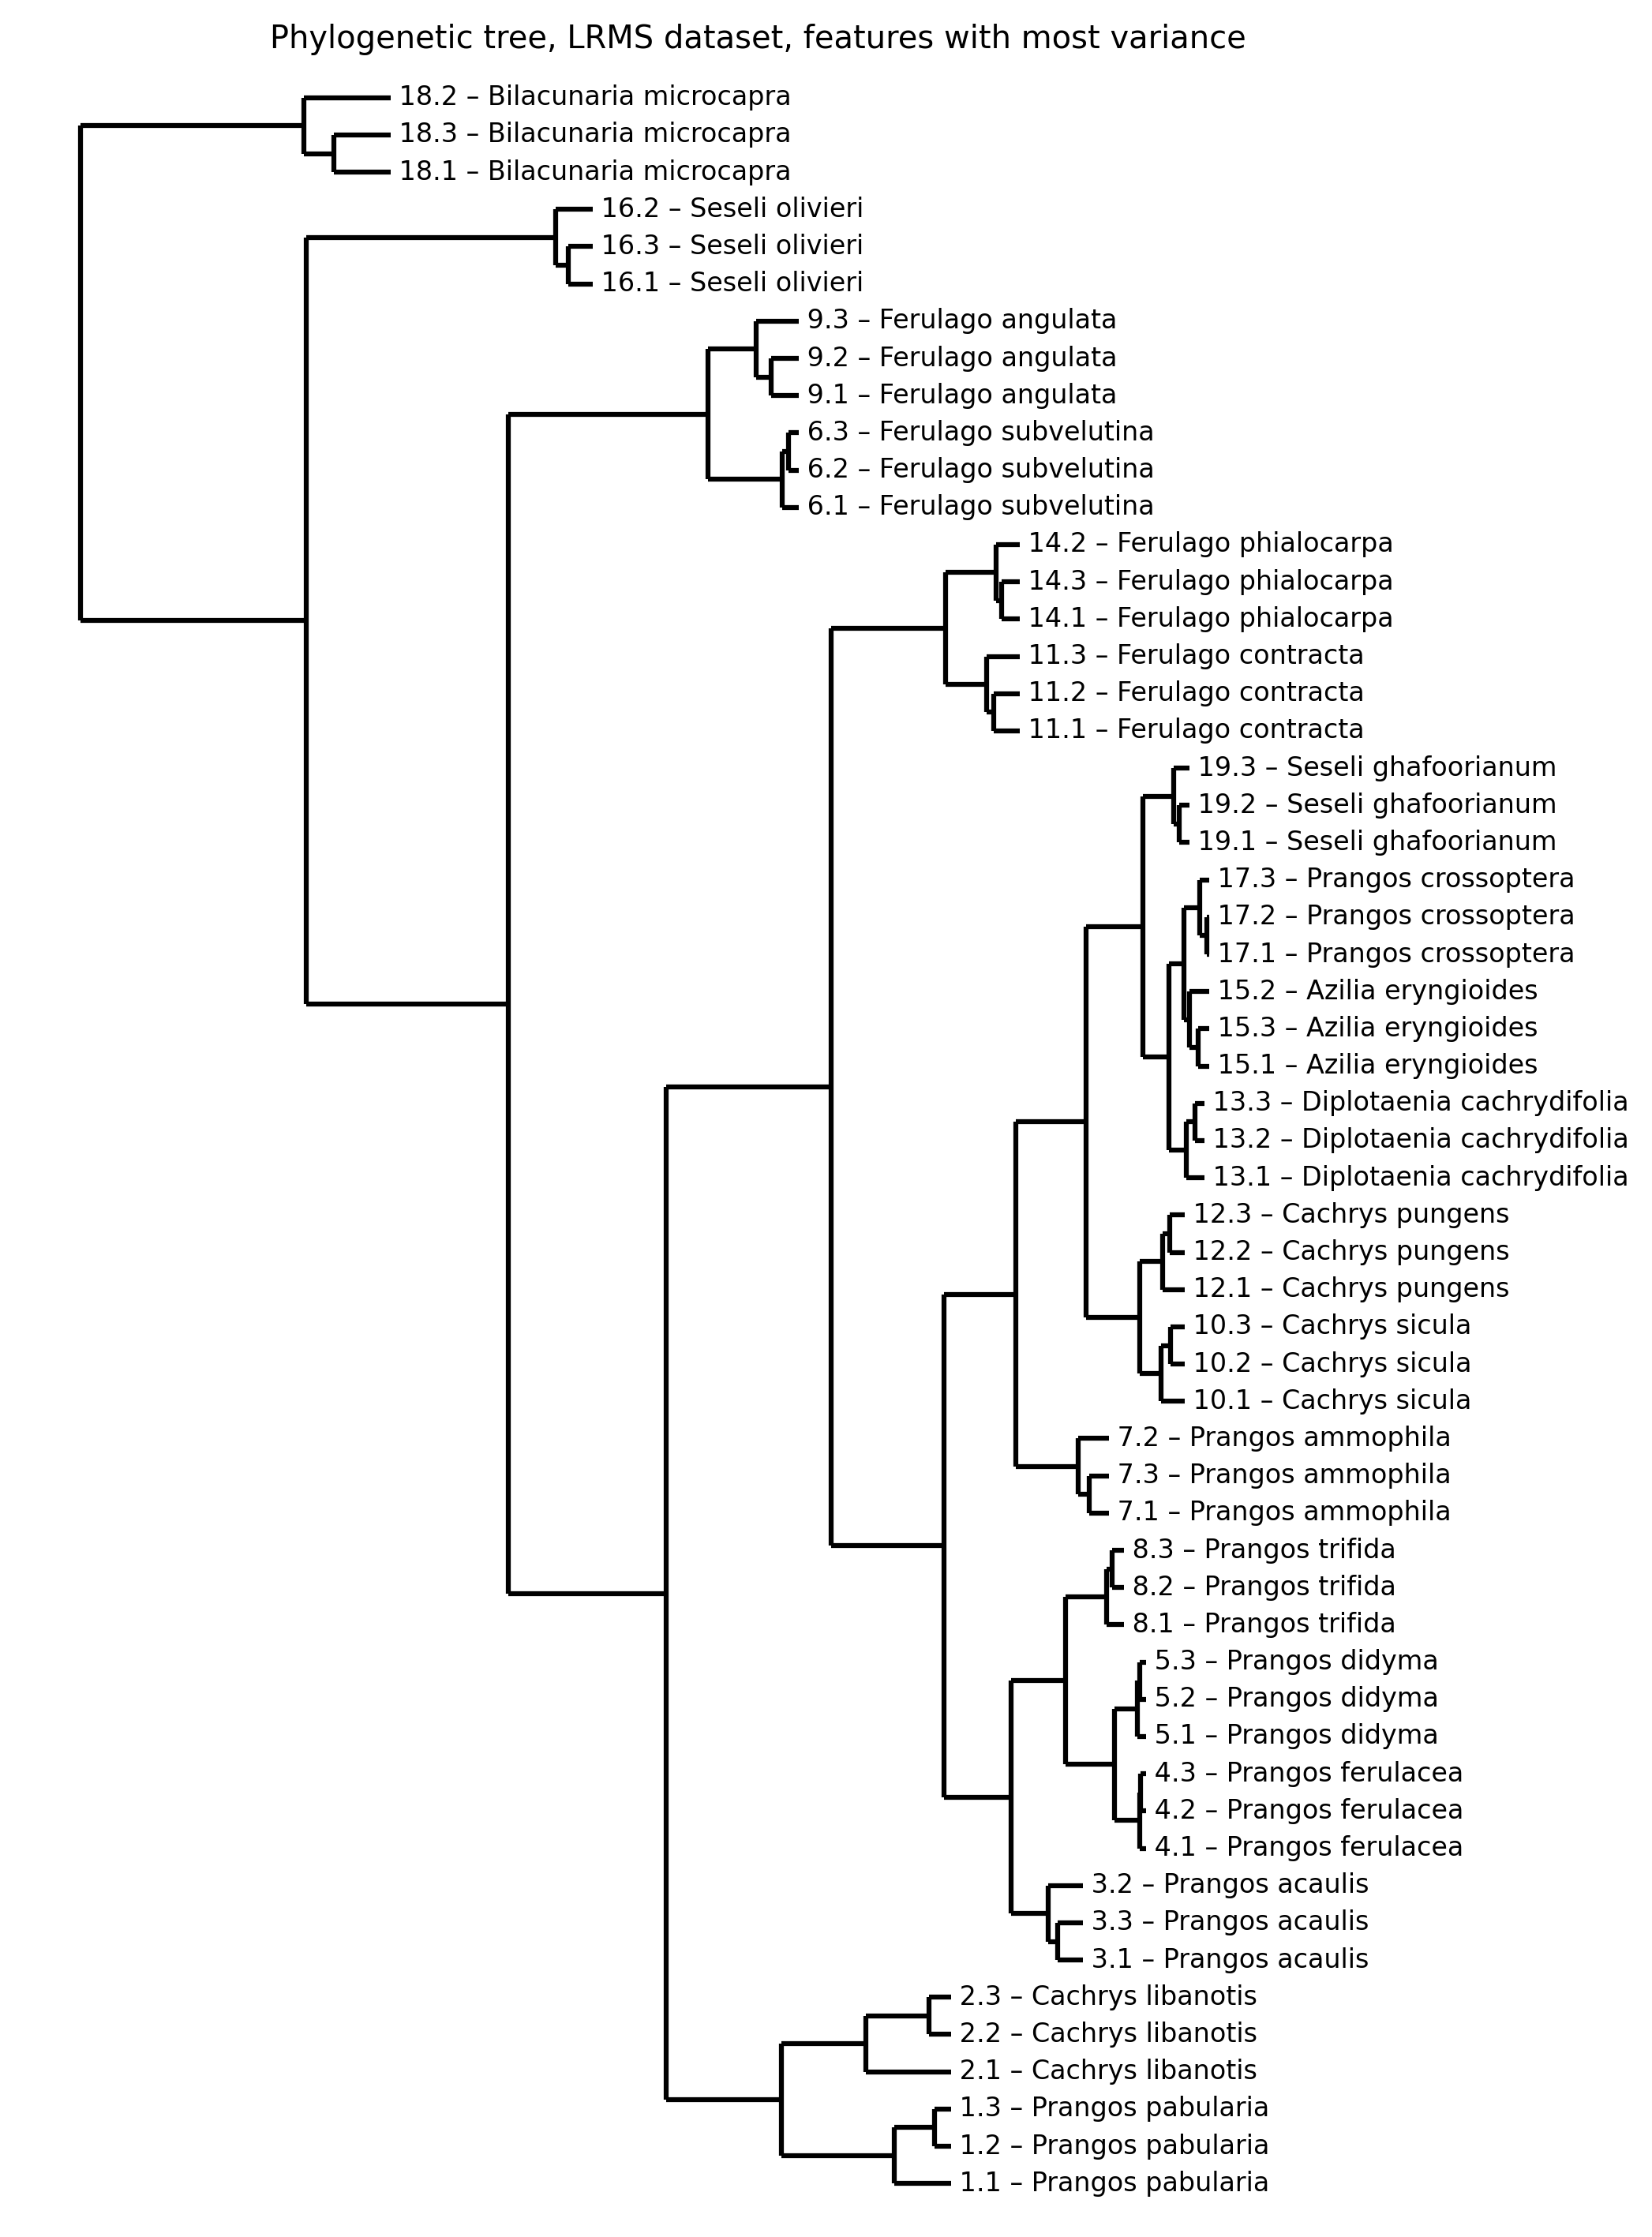

In [21]:
import Bio
from matplotlib import pyplot as plt

from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

import pandas as pd

labels_list = ['1.1 – Prangos pabularia','1.2 – Prangos pabularia','1.3 – Prangos pabularia',
        '2.1 – Cachrys libanotis','2.2 – Cachrys libanotis',
        '2.3 – Cachrys libanotis',
        '3.1 – Prangos acaulis','3.2 – Prangos acaulis','3.3 – Prangos acaulis',
        '4.1 – Prangos ferulacea','4.2 – Prangos ferulacea','4.3 – Prangos ferulacea',
        '5.1 – Prangos didyma','5.2 – Prangos didyma','5.3 – Prangos didyma',
        '6.1 – Ferulago subvelutina',
        '6.2 – Ferulago subvelutina','6.3 – Ferulago subvelutina ',
        '7.1 – Prangos ammophila','7.2 – Prangos ammophila','7.3 – Prangos ammophila',
        '8.1 – Prangos trifida','8.2 – Prangos trifida','8.3 – Prangos trifida',
        '9.1 – Ferulago angulata','9.2 – Ferulago angulata',
        '9.3 – Ferulago angulata',
        '10.1 – Cachrys sicula','10.2 – Cachrys sicula', '10.3 – Cachrys sicula',
        '11.1 – Ferulago contracta','11.2 – Ferulago contracta','11.3 – Ferulago contracta',
        '12.1 – Cachrys pungens',
        '12.2 – Cachrys pungens', '12.3 – Cachrys pungens',
        '13.1 – Diplotaenia cachrydifolia','13.2 – Diplotaenia cachrydifolia','13.3 – Diplotaenia cachrydifolia',
        '14.1 – Ferulago phialocarpa','14.2 – Ferulago phialocarpa','14.3 – Ferulago phialocarpa',
        '15.1 – Azilia eryngioides','15.2 – Azilia eryngioides','15.3 – Azilia eryngioides',
        '16.1 – Seseli olivieri', '16.2 – Seseli olivieri', '16.3 – Seseli olivieri',
        '17.1 – Prangos crossoptera', '17.2 – Prangos crossoptera',
        '17.3 – Prangos crossoptera',
        '18.1 – Bilacunaria microcapra',
        '18.2 – Bilacunaria microcapra','18.3 – Bilacunaria microcapra',
        '19.1 – Seseli ghafoorianum','19.2 – Seseli ghafoorianum','19.3 – Seseli ghafoorianum']


column_list=numpy.arange(1,len(factors_non_negative[0][0])+1)

my_dataframe=pd.DataFrame(data=factors_non_negative[0],index=labels_list,columns=column_list)

from scipy.spatial import distance_matrix
dist=distance_matrix(my_dataframe.values, my_dataframe.values)
dist_list=dist.tolist()

for i in range (len(dist_list)-1):
    del dist_list[i][i+1:len(labels)]
    
dist_bio=Bio.Phylo.TreeConstruction.DistanceMatrix(labels_list, matrix=dist_list)

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dist_bio)

for i in range (1,len(labels)):
    name_clade='Inner'+str(i)
    tree.common_ancestor({"name": name_clade}).name=''
    
    
from matplotlib import pyplot as plt
matplotlib.rc('font', size=8)
# set the size of the figure
fig = plt.figure(figsize=(8, 12), dpi=300)
# alternatively
# fig.set_size_inches(10, 20)
axes = fig.add_subplot(1, 1, 1)
plt.title("Phylogenetic tree, LRMS dataset, features with most variance")
plt.box(on=None)
plt.axis('off')
Phylo.draw(tree, axes=axes)

In [24]:
#labels for 19 classes
cluster_labels = []
for i in range (len(labels)):
    cluster_labels.append(int(int(labels[i])//100))  

# Binarize the output
y_bin = label_binarize(cluster_labels, classes=[1,3,4,5,6,7,8,9,10,11,13,14,16,18,19,20,21,22,23])
n_classes = y_bin.shape[1]
X_train, X_test, y_train, y_test = train_test_split(factors_non_negative[0], y_bin, test_size=.5,stratify=y_bin,random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = numpy.unique(numpy.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = numpy.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += numpy.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
print (roc_auc["macro"])

0.9975633528265108
